# **Procesado Digital de Imagen**

## Lab 1: Introducción al procesado de imágenes con Python

2021 - Veronica Vilaplana - [GPI @ IDEAI](https://imatge.upc.edu/web/) Research group

-----------------

En esta práctica introduciremos las herramientas que utilizaremos en los laboratorios de Procesado Digital de Imagen: Python, Colab y la librería Scikit-image. Aprenderemos a trabajar con notebooks en Colab y veremos algunas funciones de `scikit-image`.

<font color='red'>Nombre Estudiantes:</font> **Yago Carballo Barroso**




##<font color=red>Nota importante:</font>
####<font color=red>Si no estás familiarizado con Colab o con Python, comienza con los siguientes tutoriales.</font>


##1. Introducción a Colab
* https://colab.research.google.com/notebooks/intro.ipynb

##2. Introducción a Python
* https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb

* https://www.learnpython.org/

* https://docs.python.org/3/tutorial/

* Whirlwind Tour of Python: https://github.com/jakevdp/WhirlwindTourOfPython

##3. Introducción a scikit-image


Hay muchas liberías de procesado de imagen en Python. En los laboratorios utilizaremos principalmente **scikit-image**, a una colección de funciones y algoritmos para procesado de imagen (https://scikit-image.org/). Aún si apenas conoces Python, scikit-image es una libreria fácil de aprender y usar.

Otras librerías de imagen:

*   Pillow (https://pillow.readthedocs.io/en/stable/index.html)  para procesado de imagen
*   scip.ndimage (https://docs.scipy.org/doc/scipy/reference/ndimage.html) para procesado de imagen multidimensional
*   Open CV (https://opencv.org/) para visión por computador


##3.1. Lectura de imágenes

Aprenderemos como importar imágenes en Python usando scikit-image. Primero cargaremos imágenes de ejemplo de la galería de imágenes de la librería, y luego aprenderemos a cargar imágenes en Colab desde el ordenador.


### Cargando imágenes desde skimage
El primer paso es importar las librerías o funciones que necesitaremos: NumPy y Matplotlib. Al importar una librería, puedes asignarle un alias para simplficar la escritura de las funciones. El siguiente código muestra los comandos de importación necesarios.

Dentro del paquete scikit-image, hay varias imágenes de muestra proporcionadas en el módulo `data` (https://scikit-image.org/docs/dev/api/skimage.data.html). Podemos usarlas para probar algunas de las funciones básicas. Usamos la función `plt.imshow` para visualizar la imagen

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread, imshow
from skimage import data

In [ ]:
im_camera = data.camera()
plt.imshow(im_camera, cmap='gray')
plt.show()

Crearemos una función `display_image` para visualizar imágenes y controlar el factor de escalado. No es necesario que entiendas por completo el código (aun!).


In [2]:
def display_image(img_in, title='', size=None):
  img = img_in.astype(np.double)
  img = img - np.min(img)
  img = img / np.max(img)

  plt.gray()
  h = plt.imshow(img, interpolation='none')
  if size:
    dpi = h.figure.get_dpi()/size
    h.figure.set_figwidth(img.shape[1] / dpi)
    h.figure.set_figheight(img.shape[0] / dpi)
    h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)
    h.axes.set_position([0, 0, 1, 1])
    h.axes.set_xlim(-1, img.shape[1])
    h.axes.set_ylim(img.shape[0], -1)
  plt.grid(False)
  plt.title(title)
  plt.show()

Usando esta función, mostramos la imagen `camera` a la mitad del tamaño original (parámetro size=0.5) con el siguiente comando:

In [ ]:
display_image(im_camera,size=0.5)

Las imágenes en scikit-image están representadas por arrays NumPy . Por lo tanto, se pueden realizar muchas operaciones comunes utilizando métodos NumPy estándar de maniuplación de matrices.

Una imagen de un solo canal, o imagen en escala de grises, es una matriz 2D con valores de intensidad de píxeles de forma (n_row, n_col), donde n_row denota el número de filas y n_col el número de columnas.

Para conocer el tipo de variable, el tipo de datos de la imagen, la geometría de la imagen (número de filas y columnas) y el número de píxeles usamos `type`,`dtype`,` shape` y `size`:

In [ ]:
print('Image type:',type(im_camera))
print('Image data type:', im_camera.dtype)
print('Iamera shape:',im_camera.shape)
print('Iamera size:',im_camera.size)

Vemos que `camera` es un NumPy ndarray, representado por enteros sin signo, con 512 filas, 512 columnas y un número total de 262144 píxeles.

###Numpy para imágenes

La indexación NumPy se puede utilizar para ver los valores de los píxeles y modificarlos.

¡Ten cuidado! En la indexación NumPy, la primera dimensión (`camera.shape [0]`) corresponde a filas, mientras que la segunda (`camera.shape [1]`) corresponde a columnas, con el origen (camera [0, 0]) en la esquina superior izquierda. Esto coincide con la notación matricial de álgebra lineal, pero contrasta con las coordenadas cartesianas (x, y).

Podemos ver la imagen con la función `imshow`. Pero, ¿cómo se almacenan las imágenes? Podemos comprobarlo imprimiendo el contenido de la variable *camera*

In [ ]:
# Print image values
print(im_camera)

In [ ]:
# Get the value of the pixel at the 10th row and 20th column
im_camera[10, 20]

In [ ]:
# Set to black the pixel at the 3rd row and 10th column
im_camera[3, 10] = 0

Podemos calcular algunas estadísticas simples de la imagen, como sus valores mínimo, máximo o el valor medio:

In [ ]:
print('[min,max]=', [im_camera.min(), im_camera.max()])
print('mean=', im_camera.mean())

####Mapas de colores (colormaps o lookup tables)

`camera` es una imagen en niveles de gris.

Por tanto, para visualizarla utilizamos un mapa de colores con diferentes niveles de gris. Pero podríamos usar otro mapa de colores. Un mapa de colores también se denomina *lookup table* o LUT. Una LUT es una asignación de colores a los valores de los píxeles. Estos mapas de color pueden ayudar a visualizar imágenes, especialmente cuando se usa falso color (una forma diferente de visualizar una imagen, asignando a los pixeles colores que no son los originales).

Para más información consulta https://matplotlib.org/stable/tutorials/colors/colormaps.html#colorcet.

In [ ]:
cmaps = ["inferno", "Pastel1", "cool", "rainbow"]
for comap in cmaps:
   plt.imshow(im_camera, cmap=comap)
   plt.show()


###Imágenes color
Una imagen en color es una matriz NumPy con una dimensión final adicional para los canales. También usamos `plt.imshow` para mostrar una imagen en color.

Como ejemplo, cargamos y visualizamos la imagen *astronaut* de la galería de scikit-image.

In [ ]:
im_astro = data.astronaut()
plt.imshow(im_astro)

También podemos usar la función `display_image` para ver la imagen a su resolución original:

In [ ]:
display_image(im_astro,size=1)

In [ ]:
print(type(im_astro))
print(im_astro.dtype)
print(im_astro.shape)

Esto muestra que *astronaut* es una imagen de 512 por 512 píxeles con tres canales (rojo, verde y azul), donde cada canal se representa con números enteros sin signo. Como antes, podemos imprimir los valores de la imagen (ahora tres valores por píxel, las componentes roja, verde y azul), y podemos obtener y cambiar los valores de los píxeles.


In [ ]:
print(im_astro)

In [ ]:
im_astro[10, 20]

In [ ]:
# set the pixel at (50th row, 61st column) to "green"
im_astro[50, 61] = [0, 255, 0]  # [red, green, blue]

###Lectura de imágenes del ordenador

Si queremos cargar una imagen desde nuestro ordenador en lugar de utilizar las provistas en la galería de scikit-image, podemos usar la función `imread`. Dado que estamos usando Colab, primero debemos cargar el archivo.

Para obtener o cargar el archivo en la notebook: en el lado izquierdo de la notebook, encontrarás una pestaña con tres opciones; debes seleccionar **Files (o 'Archivos')**. Luego, puedes cargar fácilmente el archivo con la ayuda de la opción **Upload** (primer ícono). Selecciona el archivo `color_pencils1.jpg`. Una vez que se cargue el archivo, verás el nombre del archivo en el panel izquierdo.
Es importante tener en cuenta que los archivos cargados se eliminarán cuando se reinicie la ejecución de la notebook.

[color pencils1.jpg source:
https://commons.wikimedia.org/wiki/File:Seven_Coloured_Pencils_(simulate_Wide_Gamut_display).jpg]



In [ ]:
im_pencils = imread('color_pencils1.jpg')
display_image(im_pencils)

Podemos mostrar cada canal R, G y B por separado:

In [ ]:
#width, hight
plt.figure(figsize=(12,4))
plt.subplot(141), imshow(im_pencils)
plt.title('Color image')
plt.axis('off')
plt.subplot(142), imshow(im_pencils[:,:,0])
plt.title('R component')
plt.axis('off')
plt.subplot(143), imshow(im_pencils[:,:,1])
plt.title('G component')
plt.axis('off')
plt.subplot(144), imshow(im_pencils[:,:,2])
plt.title('B component')
plt.axis('off')
plt.show()

Al analizar estas imágenes, vemos cómo se almacena la información de color en cada componente. Vemos valores altos (blanco o gris claro) en el canal rojo para lápices amarillos, naranjas y rojos (colores que contienen rojo) y valores bajos (negro o gris oscuro) en el canal rojo para colores que no contienen rojo (como azul y verde), valores más altos en la componente verde para lápices verdes y amarillos, valores más altos en la componente azul para lápices azul y celeste y magenta, etc.

###Cambio de Espacio Color
Hay varias funciones para convertir entre diferentes espacios de color: RGB, HSV, LAB, etc. y para convertir imágenes de color verdadero a escala de grises. En la siguiente práctica trataremos este tema con mayor profundidad.


In [ ]:
# we use rgb2gray to convert a true color rgb image to grayscale
from skimage.color import rgb2gray, rgb2hsv
im_pencilsgray = rgb2gray(im_pencils)
display_image(im_pencilsgray)

Observa que esta imagen en escala de grises es diferente de los canales R, G, B mostrados anteriormente. Esta imagen contiene la información de brillo (es como una imagen en blanco y negro de la imagen color). Es la componente de luminancia o brillo de la imagen.

##3.2 Cambio de tamaño, rotación y recorte de imágenes

####Cambio de tamaño

Si queremos cambiar el tamaño de una imagen odemos usar la función scikit-image `resize`, donde la entrada es la imagen original y las nuevas dimensiones de la imagen. Esta función realiza una interpolación cuando se aumenta el tamaño y un diezmado cuando se reduce el tamaño de las imágenes. En el último caso, se aplica un filtro de paso bajo para evitar artefactos debidos al aliasing.

In [ ]:
from skimage.transform import resize

print(im_astro.shape)
display_image(im_astro,size=1)
plt.show()
im_resize = resize(im_astro, (250,250), anti_aliasing=True)
display_image(im_resize,size=1)
plt.show()
im_resize = resize(im_astro, (512,250), anti_aliasing=True)
display_image(im_resize,size=1)
plt.show()
im_resize = resize(im_astro, (100,250), anti_aliasing=True)
display_image(im_resize,size=1)
plt.show()

####"Rescale"

Si queremos escalar una imagen por un factor fijo podemos usar la función `rescale`.

Por ejemplo, reducir a la cuarta parte (0.25), o aumentar el tamaño por un factor de 2:


In [ ]:
print(im_astro.shape)

In [ ]:
from skimage.transform import rescale
im_rescaled = rescale(im_astro, 0.25, anti_aliasing=True, multichannel=True)
display_image(im_rescaled,size=1)
im_rescaled = rescale(im_astro, 2, anti_aliasing=True, multichannel=True)
display_image(im_rescaled,size=1)

####Rotar la imagen

Usamos la función `rotate` para rotar una imagen, especificando el ángulo de rotación.

In [ ]:
from skimage.transform import rotate
im_rotated = rotate(im_astro, angle=45)
display_image(im_rotated, size=0.5)

El problema con esto es que la imagen se recorta en las esquinas. Esto sucede porque durante la rotación el tamaño de la imagen sigue siendo el mismo, lo que hace que se recorte el área alrededor de las esquinas.
Una solución es usar el parámetro *resize* (el valor defalut es False):



In [ ]:
im_rotated = rotate(im_astro, angle=45, resize=True)
display_image(im_rotated,size=0.5)

Podemos voltear una imagen horizontal o verticalmente:

In [ ]:
from numpy import fliplr, flipud
im_fliplr = fliplr(im_astro)
im_flipud = flipud(im_astro)

plt.figure(figsize=(10,30))
plt.subplot(131), imshow(im_astro)
plt.subplot(132), imshow(im_fliplr)
plt.subplot(133), imshow(im_flipud)
plt.show()


####Recorte de imágenes

Recortamos imágenes para eliminar la parte no deseada de la imagen o para enfocar una parte particular de la imagen.

Podemos recortar la imagen especificando las nuevas dimensiones de la imagen:

In [ ]:
im_cropped = im_astro[80:180, 180:280]
display_image(im_astro,size=1)
display_image(im_cropped,size=1)

Observa el tamaño del crop:

In [ ]:
print(im_cropped.shape)

###Escritura de imágenes
Podemos guardar el recorte creado como imagen con formato 'png', utilizando la función `imsave` de scikit image.

La imagen se guardará en el espacio disponible de Colab, desde donde puedes descargarla. Más adelante veremos cómo conectar Colab con Google Drive para poder leeer y guardar imágenes y otros ficheros en tu drive.

In [ ]:
from skimage.io import imsave
imsave('astro_crop.png',im_cropped)

###<font color='blue'>Para practicar:

A continuación, escribe el código necesario para

1. Cargar en Colab una imagen en color de tu elección,

2. Leer y visualizar la imagen (usa display_image),

3. Visualizar  los canales R, G y B. Relaciona los colores de la imagen con las intensidades de los píxeles,

4. Transformar la imagen a escala de grises y visualizar,

5. Escalar, rotar y recortar la imagen con diferentes parámetros.

</font>





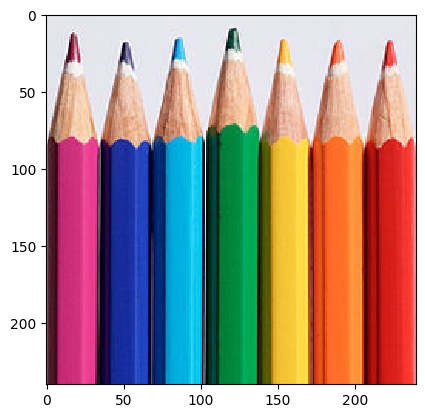

In [4]:
# 2
im = imread('color_pencils1.jpg')
display_image(im)

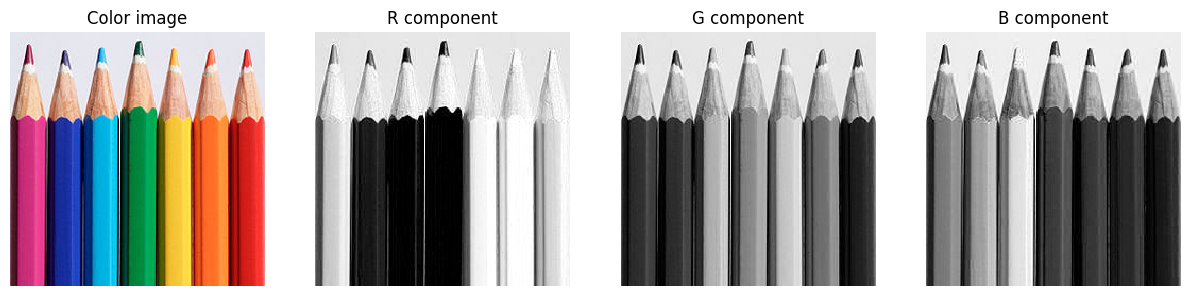

In [5]:
# 3
plt.figure(figsize=(12,4))
plt.subplot(141), imshow(im)
plt.title('Color image')
plt.axis('off')
plt.subplot(142), imshow(im[:,:,0])
plt.title('R component')
plt.axis('off')
plt.subplot(143), imshow(im[:,:,1])
plt.title('G component')
plt.axis('off')
plt.subplot(144), imshow(im[:,:,2])
plt.title('B component')
plt.axis('off')
plt.show()

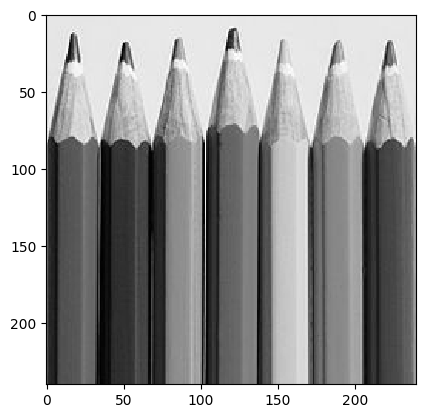

In [6]:
# 4
from skimage.color import rgb2gray, rgb2hsv
im_gray = rgb2gray(im)
display_image(im_gray)

<ipython-input-19-e8ee870593a3>:4: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  im1 = rescale(im, 0.25, anti_aliasing=True, multichannel=True)
<ipython-input-2-68ec2e8ddc51>:12: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


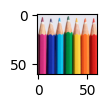

<ipython-input-19-e8ee870593a3>:6: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  im2 = rescale(im, 2, anti_aliasing=True, multichannel=True)


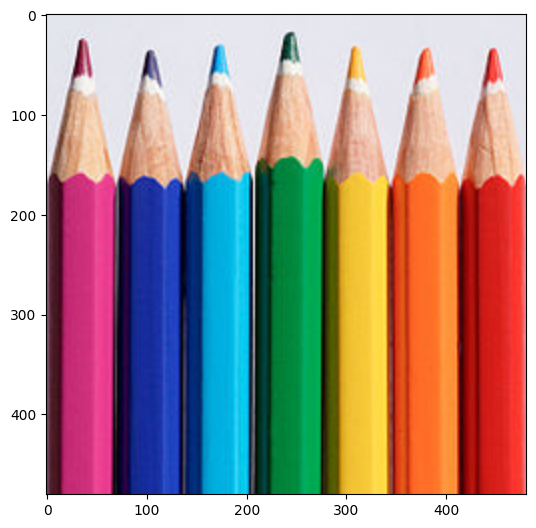

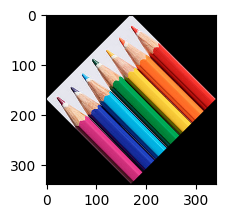

(240, 240, 3)


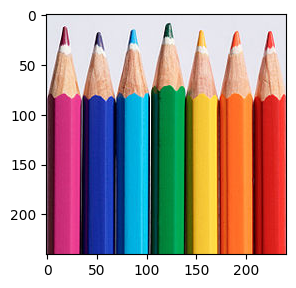

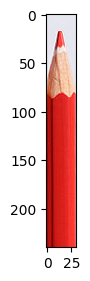

In [19]:
# 5
# Reescalar
from skimage.transform import rescale
im1 = rescale(im, 0.25, anti_aliasing=True, multichannel=True)
display_image(im1,size=1)
im2 = rescale(im, 2, anti_aliasing=True, multichannel=True)
display_image(im2,size=1)

# Rotar
from skimage.transform import rotate
im_rotar= rotate(im, angle=45, resize=True)
display_image(im_rotar,size=0.5)
# Recortar
print(im.shape)
im_recortar = im[0:240, 210:240]
display_image(im,size=1)
display_image(im_recortar,size=1)